<a href="https://colab.research.google.com/github/AtharvaKawadkar/Chronic_Kidney_Project/blob/main/Chronic_Kidney_Disease_Using_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/kidney_disease.csv')
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,1,48.0,80.0,1.020,1.0,0.0,0,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,0
1,2,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,3,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,4,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,NaN
4,5,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [ ]:
df.shape

(400, 26)

In [ ]:
#convering alpha value to numeric
df.replace(('normal', 'abnormal'), (1, 0), inplace=True)
df.replace(('present', 'notpresent'), (1, 0), inplace=True)
df.replace(('good', 'poor'), (1, 0), inplace=True)
df.replace(('yes', 'no'), (1, 0), inplace=True)
df.replace(('ckd','notckd'), (1,0), inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             249 non-null    float64
 7   pc              335 non-null    float64
 8   pcc             396 non-null    float64
 9   ba              396 non-null    float64
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             314 non-null    float64
 14  pot             313 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             329 non-null    float64
 17  wc              294 non-null    flo

In [ ]:
df['pcv'] = pd.to_numeric(df['pcv'], errors='coerce')
df['wc'] = pd.to_numeric(df['wc'], errors='coerce')
df['dm'] = pd.to_numeric(df['dm'], errors='coerce')
df['cad'] = pd.to_numeric(df['cad'], errors='coerce')
df['rc'] = pd.to_numeric(df['rc'], errors='coerce')
df["rbc"] = pd.to_numeric(df["rbc"])
df['classification'] = pd.to_numeric(df['classification'], errors='coerce')
#df["classification"] = pd.to_numeric(df["classification"])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             249 non-null    float64
 7   pc              335 non-null    float64
 8   pcc             396 non-null    float64
 9   ba              396 non-null    float64
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             314 non-null    float64
 14  pot             313 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             329 non-null    float64
 17  wc              294 non-null    flo

In [ ]:
df.isnull().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               151
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                86
pot                87
hemo               52
pcv                71
wc                106
rc                131
htn                 2
dm                  8
cad                 4
appet               1
pe                  1
ane                 1
classification    225
dtype: int64

In [ ]:
df = df.interpolate(method = 'spline', order = 3)
display(df.isna().sum())

age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

In [ ]:
df = df.set_index("id")

In [ ]:
df.shape

(400, 25)

In [ ]:
df['classification'] = df['classification'].astype(np.int64)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  after removing the cwd from sys.path.


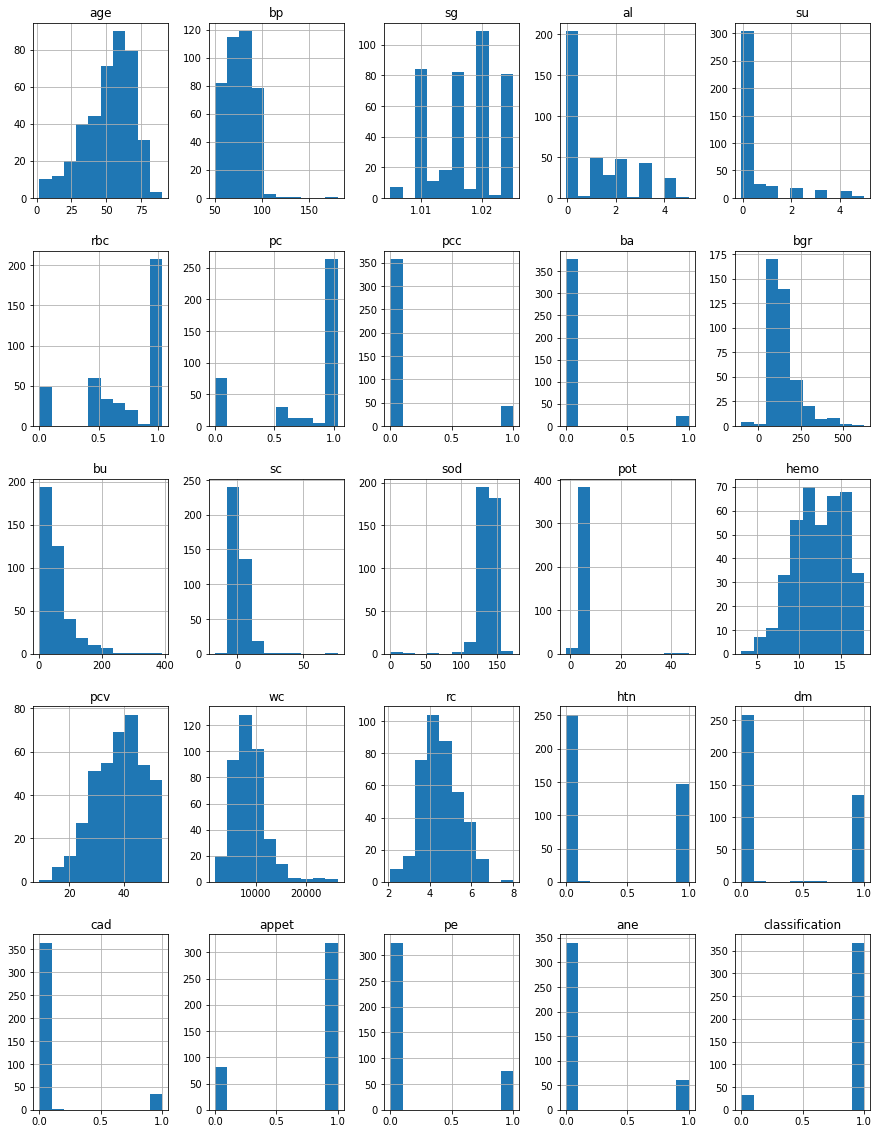

In [ ]:
# plot histogram to see the distribution of the data
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df.hist(ax = ax)
plt.show()

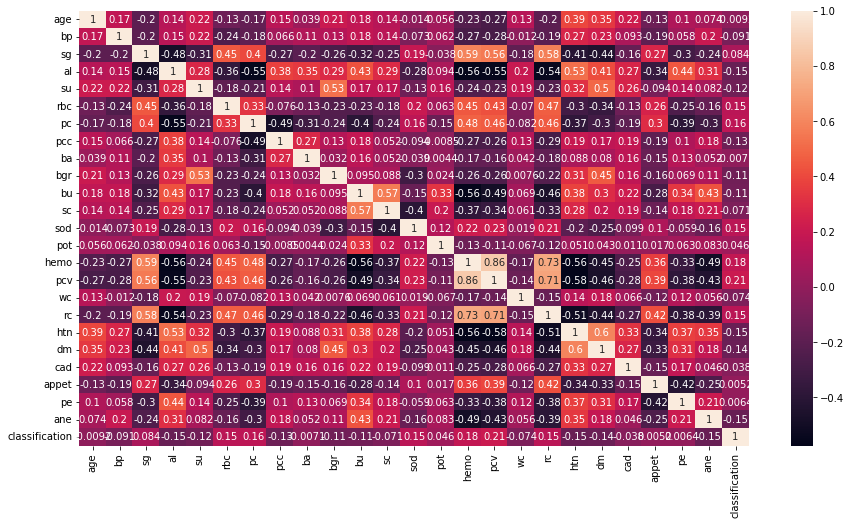

In [ ]:
# correlation between attributes and target variable
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot = True)
plt.show()

In [ ]:
!pip install Boruta

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 56 kB 2.8 MB/s 


In [ ]:
from boruta import BorutaPy
from sklearn.ensemble import RandomForestClassifier 

In [ ]:
#define the features
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values
forest = RandomForestClassifier(n_estimators=1000, n_jobs=-1, class_weight='balanced')

# define Boruta feature selection method
feat_selector = BorutaPy(forest, n_estimators='auto', verbose=2)

# find all relevant features
feat_selector.fit(X, y)

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	24
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	24
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	24
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	24
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	24
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	24
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	24
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	0
Tentative: 	8
Rejected: 	16
Iteration: 	9 / 100
Confirmed: 	0
Tentative: 	8
Rejected: 	16
Iteration: 	10 / 100
Confirmed: 	0
Tentative: 	8
Rejected: 	16
Iteration: 	11 / 100
Confirmed: 	0
Tentative: 	8
Rejected: 	16
Iteration: 	12 / 100
Confirmed: 	2
Tentative: 	5
Rejected: 	17
Iteration: 	13 / 100
Confirmed: 	2
Tentative: 	5
Rejected: 	17
Iteration: 	14 / 100
Confirmed: 	2
Tentative: 	5
Rejected: 	17
Iteration: 	15 / 100
Confirmed: 	2
Tentative: 	5
Rejected: 	17
Iteration: 	16 / 100
Confirmed: 	2
Tentative: 	5
Rejected: 	17
I

BorutaPy(estimator=RandomForestClassifier(class_weight='balanced',
                                          n_estimators=34, n_jobs=-1,
                                          random_state=RandomState(MT19937) at 0x7F09B956EAF0),
         n_estimators='auto',
         random_state=RandomState(MT19937) at 0x7F09B956EAF0, verbose=2)

In [ ]:
# select the top 10 features
top_features = df.columns[df.columns!="classification"][feat_selector.ranking_ <= 10].tolist()
top_features

['age',
 'al',
 'rbc',
 'bgr',
 'bu',
 'sc',
 'sod',
 'pot',
 'hemo',
 'pcv',
 'wc',
 'rc']

In [ ]:
# select the top 6 features
top_features = df.columns[:-1][feat_selector.ranking_ <=8].tolist()
top_features

['rbc', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc']

In [ ]:
X_top = df[top_features]
y = df['classification']

In [ ]:
# new dataset
data = pd.concat([pd.DataFrame(X_top), pd.DataFrame(y)], axis=1)
data.shape

(400, 11)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)
data.head()

,rbc,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,classification
0,0.000000,0.305665,0.088575,0.194236,0.000000,0.035215,0.836735,0.777778,0.243105,0.525424,0.0
1,0.716049,1.000000,0.042362,0.189927,0.110404,0.056595,0.557823,0.644444,0.169857,0.366828,1.0
2,0.968604,0.720631,0.132221,0.200699,0.362993,0.069525,0.442177,0.488889,0.230897,0.364741,1.0
3,0.968604,0.300169,0.139923,0.222244,0.642435,0.086534,0.551020,0.511111,0.198342,0.305085,0.0
4,0.968604,0.285054,0.062901,0.196390,0.833752,0.091027,0.578231,0.577778,0.222758,0.423729,1.0


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

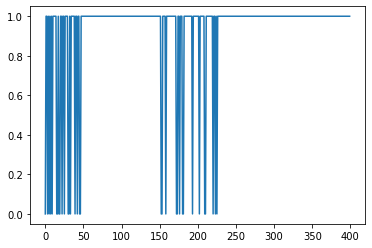

In [ ]:
temp = data['classification']
temp.plot()

In [ ]:
def df_to_X_Y(data, window_size=5):
  data_as_np = data.to_numpy()
  X = []
  Y = []
  for i in range(len(data_as_np)-window_size):
    row = [[a] for a in data_as_np[i:i+window_size]]
    X.append(row)
    label = data_as_np[i+window_size]
    Y.append(label)
  return np.array(X), np.array(Y)

In [ ]:
WINDOW_SIZE = 5
X, Y = df_to_X_Y(temp, WINDOW_SIZE)
X.shape, Y.shape

((395, 5, 1), (395,))

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2)

In [ ]:
model = Sequential()
model.add(LSTM((1),batch_input_shape=(None,5,1),return_sequences=False))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 1)                 12        
                                                                 
Total params: 12
Trainable params: 12
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='mean_absolute_error',optimizer='adam',metrics=['accuracy'])

In [ ]:
#Fitting LSTM
model.fit(X_train,Y_train,epochs = 100, validation_data=(X_test,Y_test))

Epoch 1/100
10/10 [==============================] - 3s 145ms/step - loss: 0.7301 - accuracy: 0.0728 - val_loss: 0.6958 - val_accuracy: 0.1013
Epoch 2/100
10/10 [==============================] - 0s 6ms/step - loss: 0.7006 - accuracy: 0.0728 - val_loss: 0.6677 - val_accuracy: 0.1013
Epoch 3/100
10/10 [==============================] - 0s 6ms/step - loss: 0.6705 - accuracy: 0.0728 - val_loss: 0.6399 - val_accuracy: 0.1013
Epoch 4/100
10/10 [==============================] - 0s 5ms/step - loss: 0.6422 - accuracy: 0.0728 - val_loss: 0.6122 - val_accuracy: 0.1013
Epoch 5/100
10/10 [==============================] - 0s 6ms/step - loss: 0.6131 - accuracy: 0.0728 - val_loss: 0.5859 - val_accuracy: 0.1013
Epoch 6/100
10/10 [==============================] - 0s 6ms/step - loss: 0.5860 - accuracy: 0.0728 - val_loss: 0.5606 - val_accuracy: 0.1013
Epoch 7/100
10/10 [==============================] - 0s 6ms/step - loss: 0.5597 - accuracy: 0.0728 - val_loss: 0.5368 - val_accuracy: 0.1013
Epoch 8/100

MLP

In [ ]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(6, 4), random_state=3)

In [ ]:
clf.fit(X_train,Y_train)

ValueError: ignored

In [ ]:
model_lstm=Sequential()
model_lstm.add(InputLayer((5, 1)))
model_lstm.add(LSTM(64))
model_lstm.add(Dense(8, 'relu'))
model_lstm.add(Dense(1, 'linear'))
model_lstm.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                16896     
                                                                 
 dense (Dense)               (None, 8)                 520       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 17,425
Trainable params: 17,425
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_lstm.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [ ]:
model_lstm.fit(X_train, Y_train, validation_split=0.10, epochs=100)

Epoch 1/100
9/9 [==============================] - 3s 74ms/step - loss: 1.0755 - root_mean_squared_error: 1.0371 - val_loss: 0.9717 - val_root_mean_squared_error: 0.9857
Epoch 2/100
9/9 [==============================] - 0s 7ms/step - loss: 1.0134 - root_mean_squared_error: 1.0067 - val_loss: 0.9194 - val_root_mean_squared_error: 0.9588
Epoch 3/100
9/9 [==============================] - 0s 7ms/step - loss: 0.9735 - root_mean_squared_error: 0.9867 - val_loss: 0.9011 - val_root_mean_squared_error: 0.9492
Epoch 4/100
9/9 [==============================] - 0s 7ms/step - loss: 0.9535 - root_mean_squared_error: 0.9765 - val_loss: 0.8831 - val_root_mean_squared_error: 0.9398
Epoch 5/100
9/9 [==============================] - 0s 6ms/step - loss: 0.9357 - root_mean_squared_error: 0.9673 - val_loss: 0.8727 - val_root_mean_squared_error: 0.9342
Epoch 6/100
9/9 [==============================] - 0s 9ms/step - loss: 0.9285 - root_mean_squared_error: 0.9636 - val_loss: 0.8677 - val_root_mean_squared

In [ ]:
train_predictions = model_lstm.predict(X_test).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':Y_test})
train_results

3/3 [==============================] - 0s 4ms/step


,Train Predictions,Actuals
0,0.087554,1.0
1,0.087554,1.0
2,0.087554,0.0
3,0.087554,1.0
4,0.087554,1.0
...,...,...
74,0.087554,1.0
75,0.087554,1.0
76,0.087554,1.0
77,0.087554,1.0


In [ ]:
from sklearn.metrics import r2_score
Accuracy_lstm = r2_score(train_results['Train Predictions'],train_results['Actuals'])
Accuracy_lstm

-3373303485467686.5

In [ ]:
model2 = Sequential()
model2.add(InputLayer((5, 1)))
model2.add(Conv1D(64, kernel_size=2))
model2.add(Flatten())
model2.add(Dense(8, 'relu'))
model2.add(Dense(1, 'linear'))

model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 4, 64)             192       
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dense_6 (Dense)             (None, 8)                 2056      
                                                                 
 dense_7 (Dense)             (None, 1)                 9         
                                                                 
Total params: 2,257
Trainable params: 2,257
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model2.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])


In [ ]:
model2.fit(X_train, Y_train, validation_split=0.10, epochs=100)


Epoch 1/100
9/9 [==============================] - 1s 56ms/step - loss: 0.3330 - root_mean_squared_error: 0.5771 - val_loss: 0.3214 - val_root_mean_squared_error: 0.5669
Epoch 2/100
9/9 [==============================] - 0s 7ms/step - loss: 0.2589 - root_mean_squared_error: 0.5089 - val_loss: 0.2601 - val_root_mean_squared_error: 0.5100
Epoch 3/100
9/9 [==============================] - 0s 11ms/step - loss: 0.1957 - root_mean_squared_error: 0.4424 - val_loss: 0.2127 - val_root_mean_squared_error: 0.4612
Epoch 4/100
9/9 [==============================] - 0s 7ms/step - loss: 0.1492 - root_mean_squared_error: 0.3862 - val_loss: 0.1773 - val_root_mean_squared_error: 0.4211
Epoch 5/100
9/9 [==============================] - 0s 8ms/step - loss: 0.1138 - root_mean_squared_error: 0.3373 - val_loss: 0.1532 - val_root_mean_squared_error: 0.3914
Epoch 6/100
9/9 [==============================] - 0s 10ms/step - loss: 0.0909 - root_mean_squared_error: 0.3015 - val_loss: 0.1363 - val_root_mean_squar

In [ ]:
train_predictions = model2.predict(X_test).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':Y_test})
train_results

3/3 [==============================] - 0s 4ms/step


,Train Predictions,Actuals
0,0.615757,1.0
1,0.972703,1.0
2,0.972703,1.0
3,0.972703,1.0
4,0.972703,0.0
...,...,...
74,0.972703,1.0
75,0.972703,1.0
76,0.972703,1.0
77,0.972703,1.0


In [ ]:
from sklearn.metrics import r2_score
Accuracy_cnn = r2_score(train_results['Train Predictions'],train_results['Actuals'])
Accuracy_cnn

-4.4215914221239805